# Aprendizaje no supervisado.
La mayoria de los datos no estan etiquetados. Etiquetar datos es costoso. Requiere esfuerzo humano. En este capitulo estudiamos como hacer con datos que no tienen etiquetas.



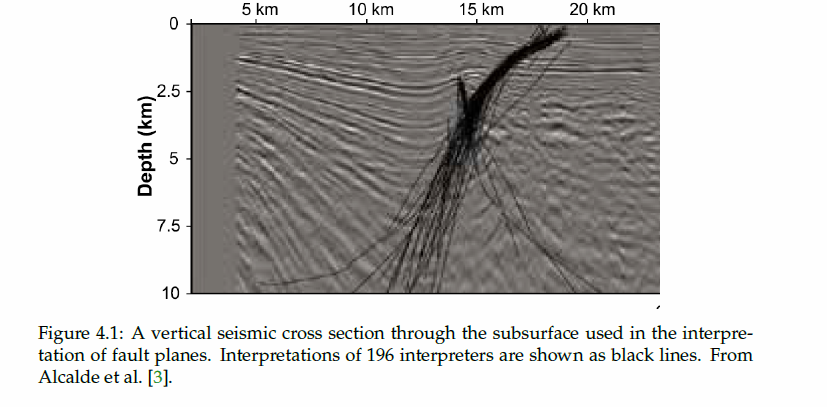

La Figura 4.1 muestra un ejemplo de una seccion sismica. Las lineas negras son intepretaciones por geologos de fallas geologicas. Observe que no son unicas.
Entonces etiquetar es subjetivo o relativo al conocimiento.

Otro ejemplo es el las casas. Asumamos que tenemos las casas pero no tenemos el precio de ellas.

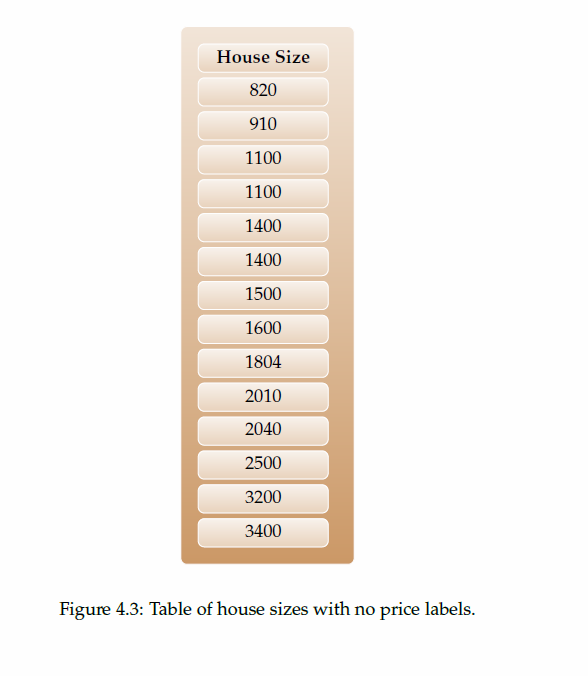

La Figura 5.3 muestra datos **no supervisados** que hacer con ellos?

Estudiamos los siguientes algoritmos para datos no supervisados.

* clustering (agrupamiento)
* reduccion de dimensionalidad (PCA).

## Clustering (agrupamiento)
Hay varios tipos de clustering

* partitioning clustering: Aca los grupos no tienen interseccion. Son exclusivos.  (por particion)

* Hierchical Clustering (por Jearquia). Se establecen jerarquias en un arbol de decision.

* Fuzzy clustering: Estos metodos asignan probabilidades a los objetos. El objeto puede estar en una clase o varias.

Nosotros en este curso solo vemos el agrupamiento por particion.

La Figura 4.4 representa las areas de la casas.

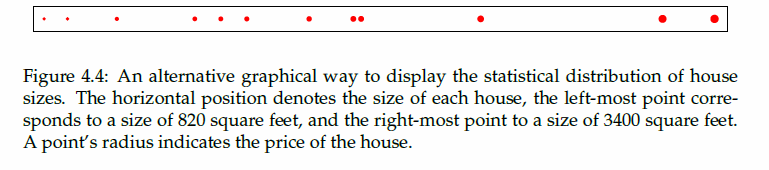

En las notas de clase explico clustering por medias, por jerarquia y por densidad. Aca solo estudiamos el metodo de clustering por medias.

* k-means
* dbscan (densidad)
* hdbscan (jerarquia y densidad).

### k-means.
Explico el algoritmo. Muestro un ejemplo y finalmente el pseudo-codigo.

1. Se decide cuantos clusters ($k$). Al final de esta seccion estudiamos metodos para determinar este hiperparametro $k$.

2. Se inicializan $k$ "centros" $\mu_i$ de forma aleatoria.

3. Se reparten los puntos entre los centros de forma que a cada centro
le corresponden los puntos mas cercanos a el.

4. La busqueda de estos puntos se hace asi. Para cada $x_i$ se encuentra el centro mas cercano a el. $u_{c_i}$ donde $c_i$ es el indice del centro.
Esto divide los $m$ puntos en $k$ grupos. Por ejemplo , con $m=8$
si tenemos tres grupos, y el vector de indices de centros es $c=[1,1,2,3,1,3,2,2]$. Esto indica que
los puntos para el centro $c_1$ son $x_1, x_2, x_5$, para el centro $c_2$ le corrsponden $x_3, x_7, x_8$ y finalmente para el centro 3, $x_4, x_6$.

4. Hallar los nuevos centros geometricos (medias). En este caso tenemos que

$$\mu_1 = \frac{x_1 + x_2 + x_5}{3} $$
$$\mu_2 = \frac{x_3 + x_7 + x_8}{3} $$
$$\mu_3 = \frac{x_4 + x_6}{2} $$

Como es costumbre debemos asignar una funcion de costo.
Esta podria ser

$$J(x, c, \mu) = \sum_{i=1}^m \| x_i - \mu_{c_i} \|^2 $$

$J$ puede llegar a ser 0, cuando $k=m$. No queremos esto.  

6. Regresamos al paso al paso 5 y asi sucesivamente (un bucle) hasta que la funcion $J$ abajo sea lo suficientemente pequenha.
Veamos un ejemplo.


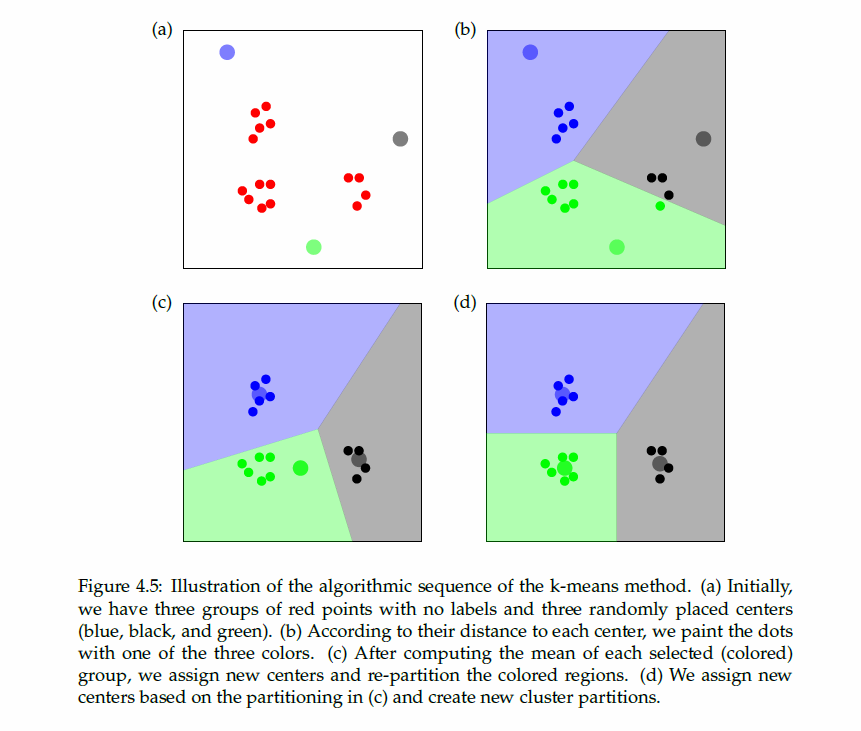

La Figura 4.6, usted la va a generar en la proxima tarea.


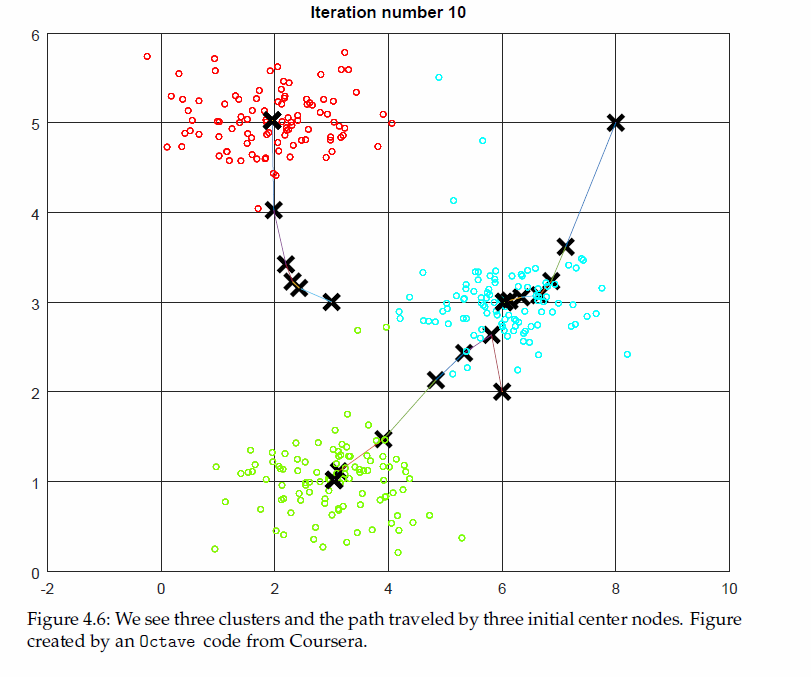

La siguiente Figura representa el pseudocodigo

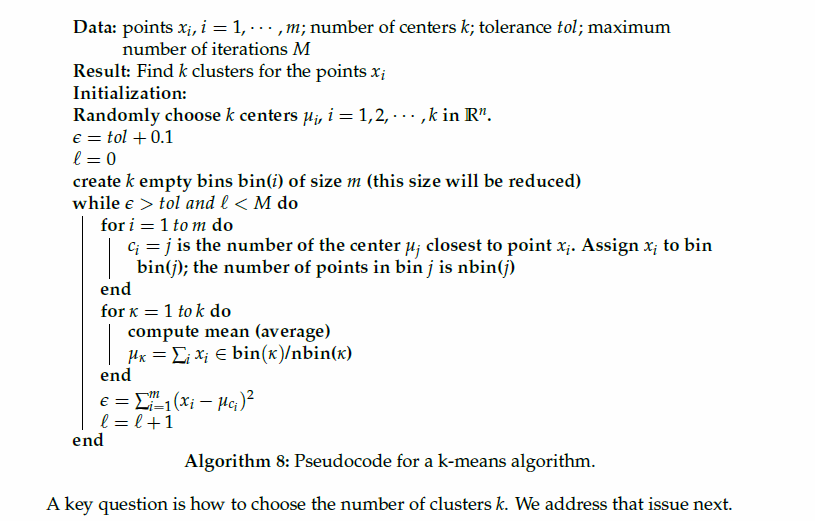

Como determinamos $k$?o

### Conteo optimo de grupos $k$
Hay dos criterios importantes para el conteo

1. Que los objetos en un grupo sean tan parecidos en su propiedad, como sea posible.
2. Objetos en grupos distintos, sean tan distintos como sea posible.

Hay varias categorias de metodos para hallar $k$ optimo.

1. **metodos directos**: El metodo del **codo** y el de la silueta.
2. **metodos estadisticos**:  "gap statistical method".

Nota: R considera mas 30 indices para hallar $k$.  Python tambien tiene otros metodos que no vemos aca.

#### Metodo del codo.
Lo explicamos con la Figura 4.7



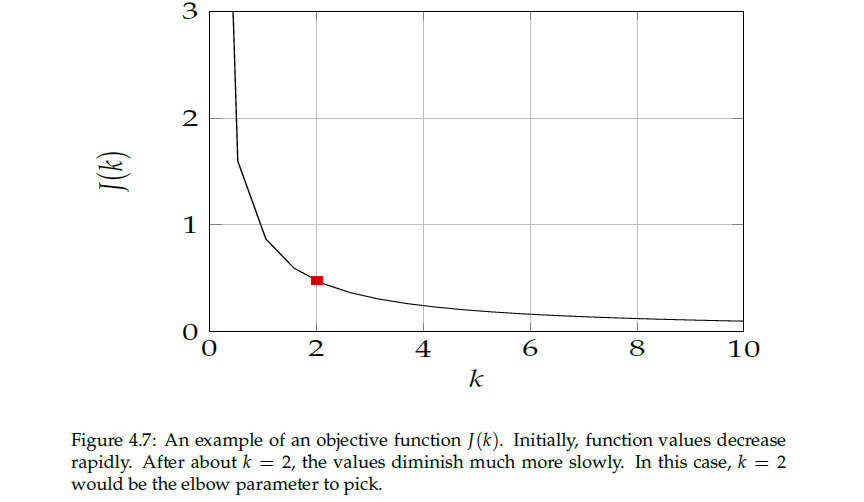

Este metodo es muy cualitativo. El punto rojo en la Figura 4.7 es donde ya la curva se aplana (plateau) y de ahi en adelante hay "diminishing returns". La relacion costo beneficio es baja. Para hacerlo cuantitativo tocaria hallar la curvatura y esto ya es muy compliado.  Entonces estudiamos el metodo de la silueta.

#### The average silhouette method (metodo de la silueta media).

Para entender este metodo vamos a hacer varias cosas

1. Definir la notacion para aclarar los conceptos.
2. Definir cohesion
3. Definir separacion
4. Definir silueta.
5. Calcular el promedio (sobre todos los puntos en el grupo) de la silueta.

**Notacion**:

Sea

$$C_I = \{ x_{I1}, x_{I2}, \cdots, x_{I kI} \} $$
El cluster $I$ donde los puntos usand dos indicies

$I$: indica el numero del cluster $c_i$
$j$: $j=1,2, \cdots k_I$ es el indice del punto dentro del cluster $I$.
$k_I = | C_i |= \text{numero de objetos en el grupo $I$} $

Vamos a definir la **cohesion** para un punto $x_{Ii}$ como el promedio
de las distancias de ese punto a todos sus vecinos.
Dado el punto $x_{iI}$

 $$a_{iI} = \frac{1}{ |C_I| - 1} \sum_{j=1}^{k_I} d(x_{Ij}, x_{Ii})  $$
 Entre mas pequenho es $a_{iI}$ mas **cohesionados** estan sus vecinos a el.

 En contraste existe la **separacion**. La separacion de un punto $x_{Ii}$  a puntos de un cluser vecino $C_{J}$, es el promedio de las distancias de ese puntos a los objetos de este cluster lejano.

 La formula esta dada por

 $$\frac{1}{ |C_J| } \sum_{j=1}^{k_J} d(x_{Ii}, x_{Jj}) $$

 Ahora bien definimos un parametro $b_{Ii}$ que mide mas exactamente la separacion como el minimo de todos estos sobre todos cluser $J \ne I$.

 $$b_{Ii} = \min_{J \ne I} \frac{1}{ |C_J| } \sum_{j=1}^{k_J} d(x_{Ii}, x_{Jj}) $$

 Ya definimos la silueta (Silhouette)

 $$s_{Ii}
 =
 \begin{cases}
 \frac{b_{Ii} - a_{Ii}}{\max \{ a_{Ii}, b_{Ii} \} } \quad , \quad \text{si } |C_I | > 1 \\
 0 \quad , \quad \text{si } |C_I | = 0.
 \end{cases} $$

 Podemos escribir entonces una funcion que se llame "silueta" de $A$ en $\mathbb{R}$ de la forma

\begin{eqnarray}
s : A &\to& \mathbb{R} \\
x_{Ii} &\mapsto& s_{Ii}
\end{eqnarray}
donde $A = \cup_{i=1}^n C_i$ donde $n$ es el numero de todos clusters $k=n$.


Para ser mas precisos.
 \begin{eqnarray}
s : A &\to& (-1 \quad 1) \\
x_{Ii} &\mapsto& s_{Ii}
\end{eqnarray}

donde $A = \cup_{i=1}^n C_i$ donde $n$ es el numero de todos clusters $k=n$.

La pagina
[Python Silhouette analysis tools](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) presenta una buena ilustracion del uso de esta herramienta.

Veamos el codigo presentado en ese pagina.

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


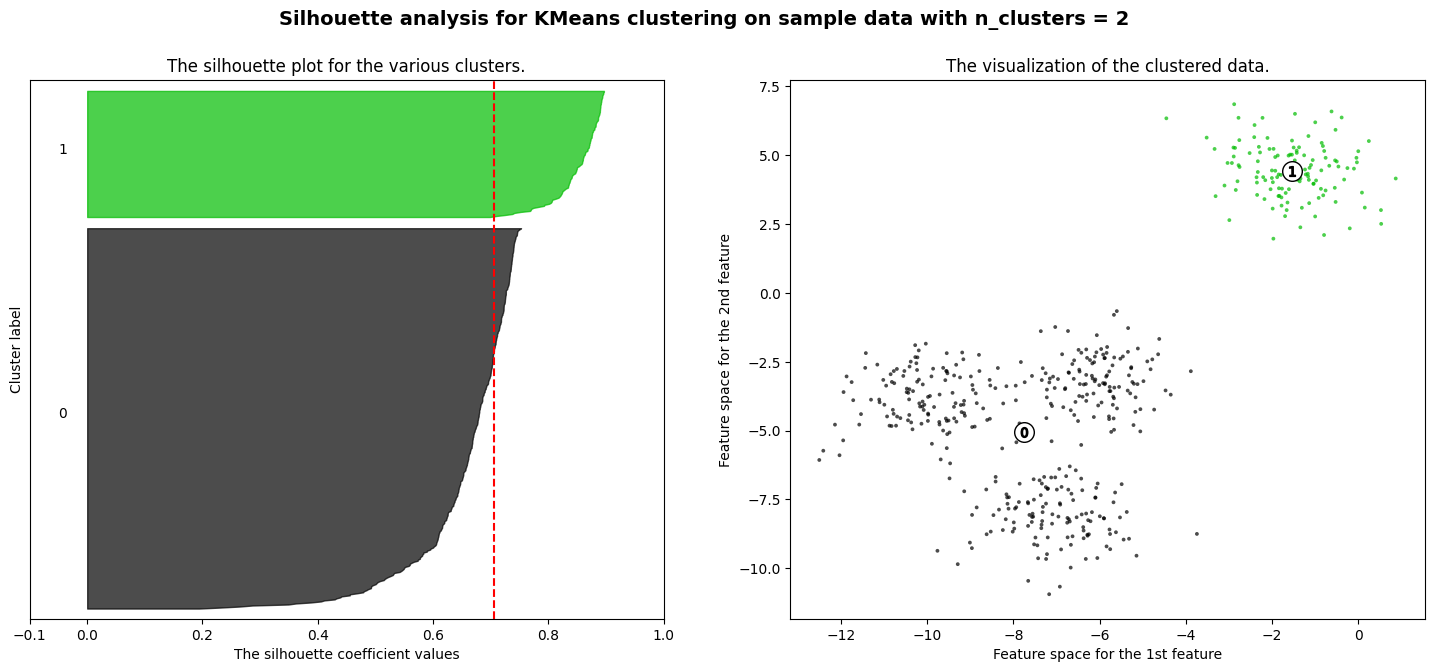

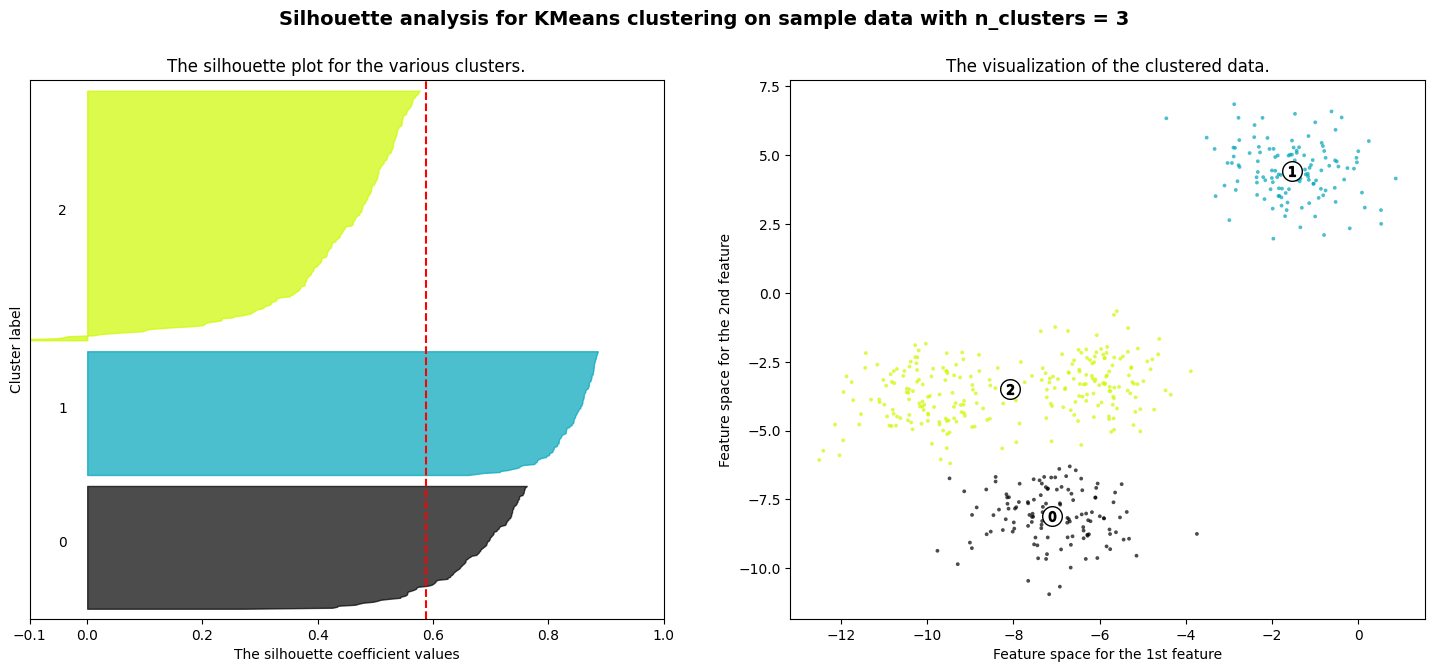

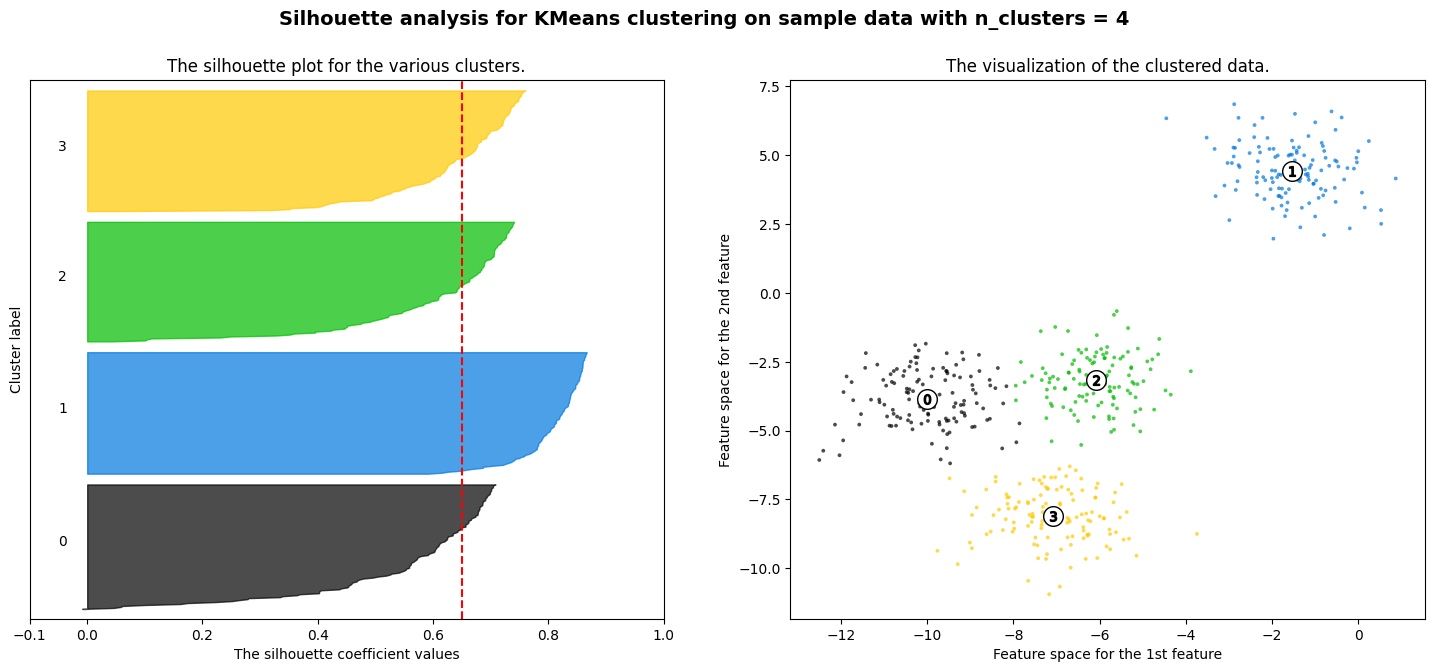

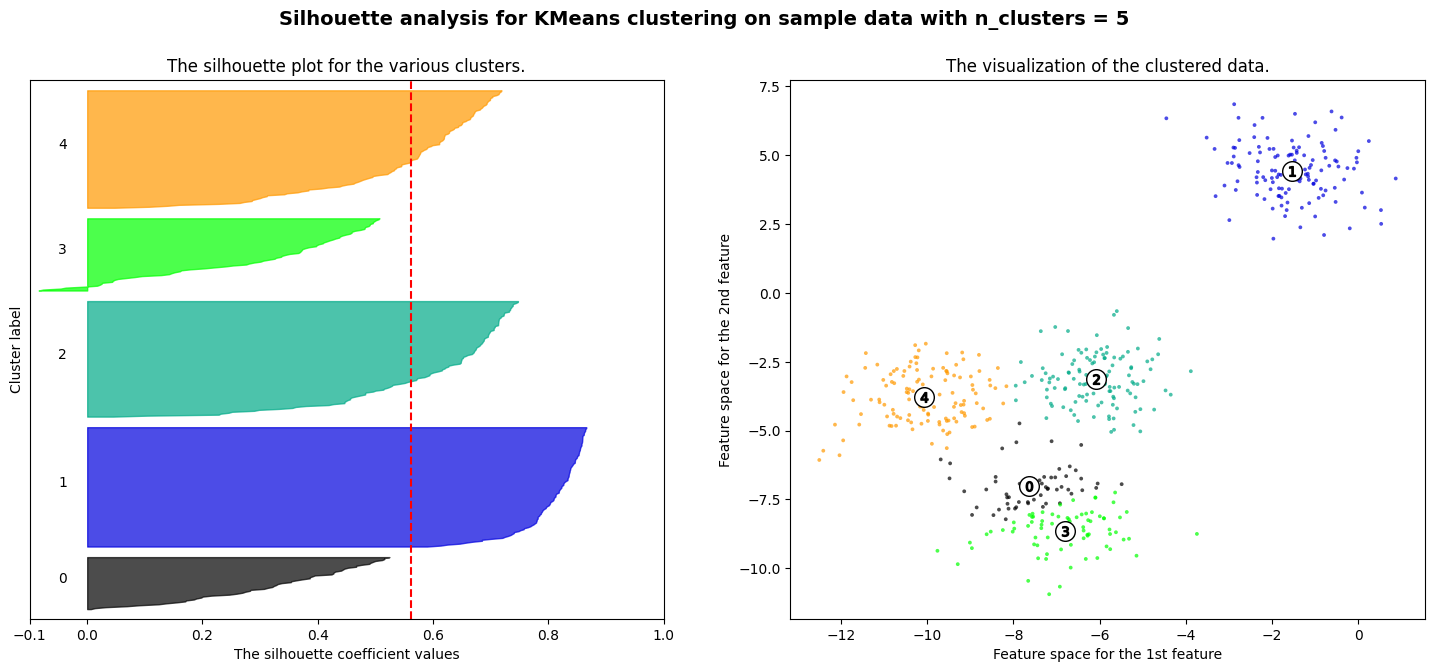

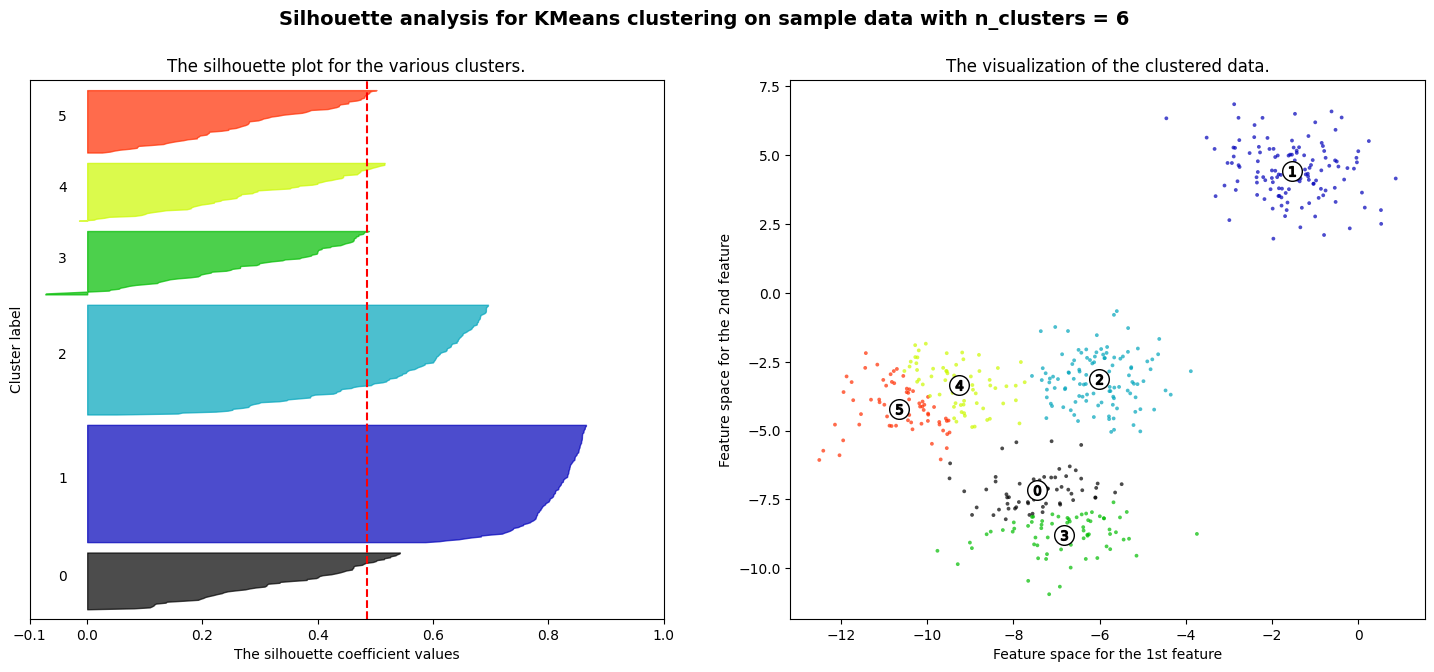

In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

No siempre k-means es el mejor.

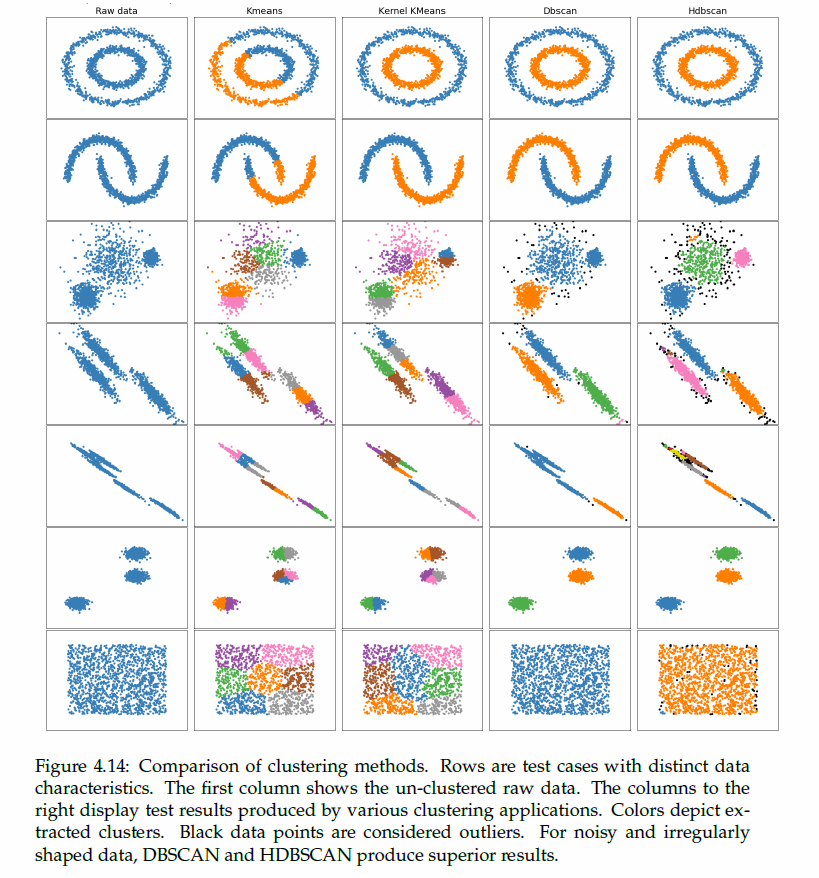

# Reduccion de dimensionalidad.
Es comun en ML que las dimensiones son grandisimas. Una forma de reducir la dimension es proyectando los datos un subespacio.

Vamos a guiarnos por la Figura 4.20.



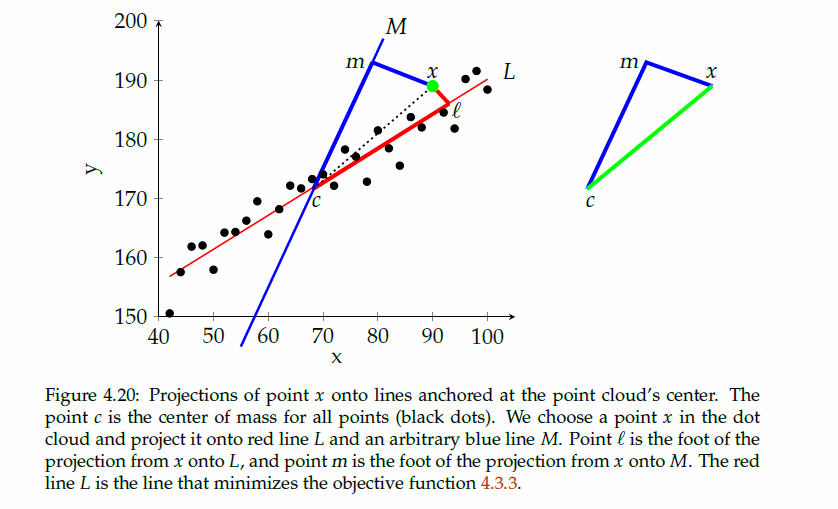

En el triangulo de la figura
1. La distancia minima $d(x,m)$ desde $x$ es un segmento azul.
2. La proyecxcion de $x$ a la linea azul esta dada por el vector $m-c$, con distancia $d(m,c)$.
3. La distancia del punto $x$ al centro de la nube es $d(x,c)$.

Por el teorema de Pitagoras tenemos que

$$d(x,c)^2 = d(x,m)^2 + d(m,c)  $$

Vamos a asumir que el centro es $c=0$, sino se normalizan los datos por media.
Usando la norma como notacion

$$\| x \|^2 = \| x - m \|^2 + \| m \|^2 \tag{1}$$

De aca podemos sacar la primera funcion de costo

$$J_0(\theta) = \sum_{i=1}^m \| x_i - m_i \|^2 $$

De la formula (1), como $\| x \|$ es constante entonces la suma a la derecha es la misma y minimizar el primer termino de esta suma es lo mismo que maximzar el segundo. Obtenemos otra funcion de costo


$$J(\theta) = \sum_{i=1}^m \| m_i \|^2 $$
Queremos encontrar el mejor angulo $\theta \in [0, 2 \pi)$ para maximizar $J(\theta)$. Este $J$ es la varianza de (sin escala) los datos sobre la linea optima.

$m_i$  es la proyeccion, distancia sobre la linea $M$ del dato $x_i$

Es decir

$$m_i = (x_i \cdot u) u $$
queremos maximizar $\sum | m_i |^2 = \sum (x_i \cdot u)^2$.
Entonces llamemos

$$X= \begin{pmatrix}  x_1 \\ x_2 \\ \vdots \\ x_m  \end{pmatrix}  $$

De forma matricial

$$ J(\theta) = \| X u \|^2 = u^T X^T X u . \tag{2} $$

Queremos maximizar esto. A la matriz $X^T X$ la llamamos matriz de **covarianza de los datos**. Queremos maximizar  (2). La ecucion (2) es el **cociente de Rayliegh the la matrix $X^T X$. El Teorema 2.3.2 de las notas dice que el valor mas grande del cociente de Rayliegh es $\lambda_1$, el autovalos mas grande de $X^T X$

$$\max_{\theta} J(\theta) = \lambda_1 $$.



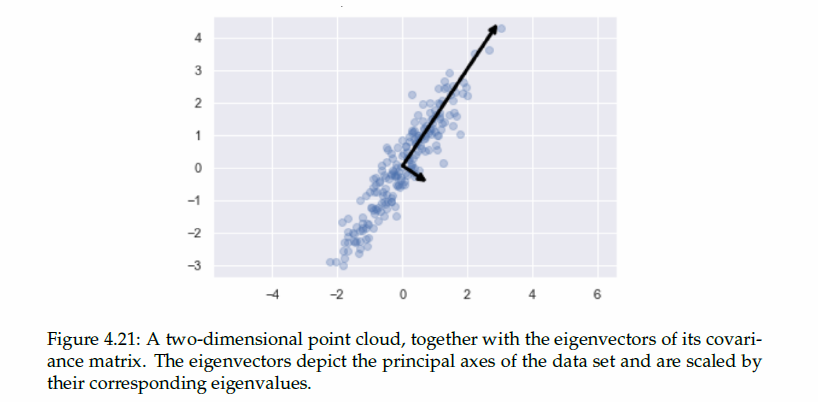

La Figura 4.21 ilustra la direccion principal a lo largo del autovector con autovalor $\lambda_1$ que mide la dispersion de los puntos a lo largo de esta direccion.

## PCA: Analisis de componentes principales

Asuma que $X= U \Lambda V^T$ entonces

$$X^T X = (V \Lambda U^T) (U \Lambda V^T) = V \Lambda^2 V. $$
donde $\Lambda^2$ es la matriz diagonal de autolores de $X^T X$, o valores singulares $\sigma_i^2$.

El PCA consiste en suprimir direcciones que no son importantes. La matriz $V$ son todas columnas (autovectores de $X^T X$). De aca podemos suprimir muchas columnas, aquellas cuyos autovalores estan por debajo de un umbral. Llamos la nueva matriz $W$

$$W = [V_1 | V_2 | \cdots | V_k] $$
donde $k < n$ ($n$ es la dimension del espacio, el numero de features).

Proyectamos los datos sobre el espacio $W$.
La formula de proyecccion

$$z_{ji} = \langle x_j, v_i \rangle , \quad , \quad j=1, \cdots, m \quad , \quad i = 1, \cdots, k. $$

En forma matricial


$$Z = X W $$
Este $Z$ es la proyeccion de todos datos $X$ al nuevo espacio $W$.
En que espacio vive $Z$?
$$(m \times n) \times (n \times k) = (m \times k)$$ esta es la dimension de $Z$.

Esto es PCA.

Como se recuperan los datos iniciales.
Para recuperar

$$X_{rec} = Z W^T  $$
Veamos
$$X_{rec} = X W W^T  $$

El algoritmo para PCA es:

* Parte I: Reduccion de dimensionalidad.
    * Se forma la matriz $X$ con los datos.
    * Hacemos SVD en $X$.
    * Estudiamos los autovalores de $X^T X$. Elegimos un umbral de forma que $\sigma_k^2$ para alla son muy pequenhos. O sea  $\sigma_j^2 < \epsilon$, para $j \ge k$.
    * Construya la matriz $W$ con las primeras $k$ columnas de $V$.
    * Proyecte los datos sobre $W$ con la operacion
    $Z = X W$.

* Parte II: reconstruccion de los datos originales
    * Backproject (proyecte hacia atras)
        $$W_{rec} = Z W^T $$

# Como escogemos $k$.
Necesitamos unas definiciones y conceptos para esto.

* **Avarage squared projection error** (el error promedio cuadrado de proyeccion);

$$\epsilon = \frac1m \sum_{i=1}^m \| x^{(i)} - x_{\text{aprox}}^{(i)} \|^2 $$

* **Porcentaje del promedio anterior con respecto a la variacion total**

La **variacion total** esta dada por

$$\text{Tot}_{\text{var}} = \frac1m \sum_{i=1}^m \| x^{(i)} \|^2 $$
El porcentaje que estamos estimando es

$$\frac{\epsilon}{\text{Tot}_{\text{var}}} = \frac{
   \frac1m \sum_{i=1}^m \| x^{(i)} - x_{\text{aprox}}^{(i)} \|^2
 }{
    \frac1m \sum_{i=1}^m \| x^{(i)} \|^2  
 } < 0.01 $$

** Suma acumulada (relativa) de valores singulares

$$\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} $$
Se puede probar (esto se deja como ejercicio)

$$\sum_{i=1}^m \| x^{(i)} \|^2 = \sum_{i=1}^n \sigma_i^2 \tag{3} $$


Veamos la matriz de error de SVD

 \begin{eqnarray*}
      \begin{pmatrix}
        0 & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & 0 \\
        \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
        \vdots & \ddots & 0 & \ddots & \vdots & \vdots & \vdots & \vdots  \\
        \vdots & \cdots & 0  & \sigma_{k+1} & 0 & \cdots & \cdots & \vdots \\
        \vdots & \cdots & \cdots & 0 & \sigma_{k+2} &  0 & \cdots & \vdots \\
        \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
        \vdots & \ddots & \ddots & \ddots & \ddots & 0 & \sigma_{n-1} & 0 \\
        0 & \cdots & \cdots & \cdots & \cdots & \cdots & 0 & \sigma_n
      \end{pmatrix} .
    \end{eqnarray*}

Tenemos, por el mismo principio anterior (3)

$$\sum_{i=1}^m \| x^{(i)} - x_{\text{approx}}^{(i)} \|^2 = \sum_{i=k+1}^n \sigma_i^2  $$

Entonces

$$ \sum_{i=1}^m \| x^{(i)} - x_{\text{approx}}^{(i)} \|^2  =\sum_{i=1}^n \sigma_i^2 - \sum_{i=1}^k \sigma_i^2$$

De forma que

$$
 \frac{
   \frac1m \sum_{i=1}^m \| x^{(i)} - x_{\text{aprox}}^{(i)} \|^2
 }{
    \frac1m \sum_{i=1}^m \| x^{(i)} \|^2  }
    = \frac{\sum_{i=1}^n \sigma_i^2 - \sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2}
    = 1 - \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} < 0.01$$
   

   Eso es equivalente a decir que

$$  \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2}  < 0.09$$





    